In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Resources  https://www.kaggle.com/datasets/uciml/indian-liver-patient-records
data=pd.read_csv("indian_liver_patient.csv")
data

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     65  Female              0.7               0.1                   187   
1     62    Male             10.9               5.5                   699   
2     62    Male              7.3               4.1                   490   
3     58    Male              1.0               0.4                   182   
4     72    Male              3.9               2.0                   195   
..   ...     ...              ...               ...                   ...   
578   60    Male              0.5               0.1                   500   
579   40    Male              0.6               0.1                    98   
580   52    Male              0.8               0.2                   245   
581   31    Male              1.3               0.5                   184   
582   38    Male              1.0               0.3                   216   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                          16                          18             6.8   
1                          64                         100             7.5   
2                          60                          68             7.0   
3                          14                          20             6.8   
4                          27                          59             7.3   
..                        ...                         ...             ...   
578                        20                          34             5.9   
579                        35                          31             6.0   
580                        48                          49             6.4   
581                        29                          32             6.8   
582                        21                          24             7.3   

     Albumin  Albumin_and_Globulin_Ratio  Dataset  
0        3.3                        0.90        1  
1        3.2                        0.74        1  
2        3.3                        0.89        1  
3        3.4                        1.00        1  
4        2.4                        0.40        1  
..       ...                         ...      ...  
578      1.6                        0.37        2  
579      3.2                        1.10        1  
580      3.2                        1.00        1  
581      3.4                        1.00        1  
582      4.4                        1.50        2  

[583 rows x 11 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [4]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [5]:
data['Albumin_and_Globulin_Ratio'] = data['Albumin_and_Globulin_Ratio'].fillna(0.947064) #Avg

<AxesSubplot:xlabel='Dataset', ylabel='count'>

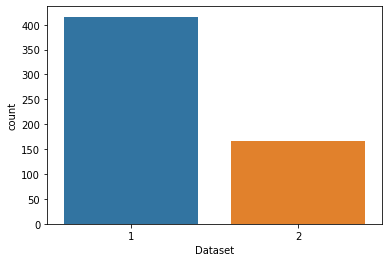

In [6]:
import seaborn as sns
sns.countplot(x='Dataset', data = data)



*   1 - No disease
*   2- Diseases



In [7]:
data['Dataset'] = data['Dataset'].replace([2,1],[1,0])
data['Dataset'].head()

0    0
1    0
2    0
3    0
4    0
Name: Dataset, dtype: int64

<AxesSubplot:xlabel='Dataset', ylabel='count'>

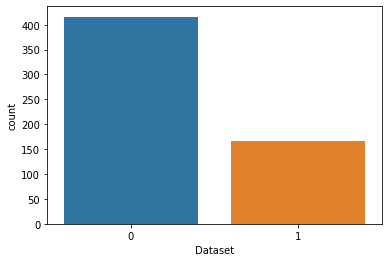

In [8]:
import seaborn as sns
sns.countplot(x='Dataset', data = data)



*   0 - No diseases
*   1- Diseases



**Based on gender**

<AxesSubplot:xlabel='Gender', ylabel='count'>

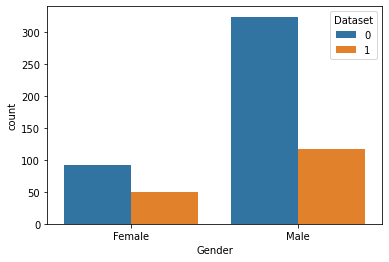

In [9]:
sns.countplot(x='Gender', data = data, hue = 'Dataset')# gender diff

In [10]:
data = pd.get_dummies(data, columns = ['Gender'], drop_first = True)

In [11]:
data.head()

Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65              0.7               0.1                   187   
1   62             10.9               5.5                   699   
2   62              7.3               4.1                   490   
3   58              1.0               0.4                   182   
4   72              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  Gender_Male  
0      3.3                        0.90        0            0  
1      3.2                        0.74        0            1  
2      3.3                        0.89        0            1  
3      3.4                        1.00        0            1  
4      2.4                        0.40        0            1

<AxesSubplot:>

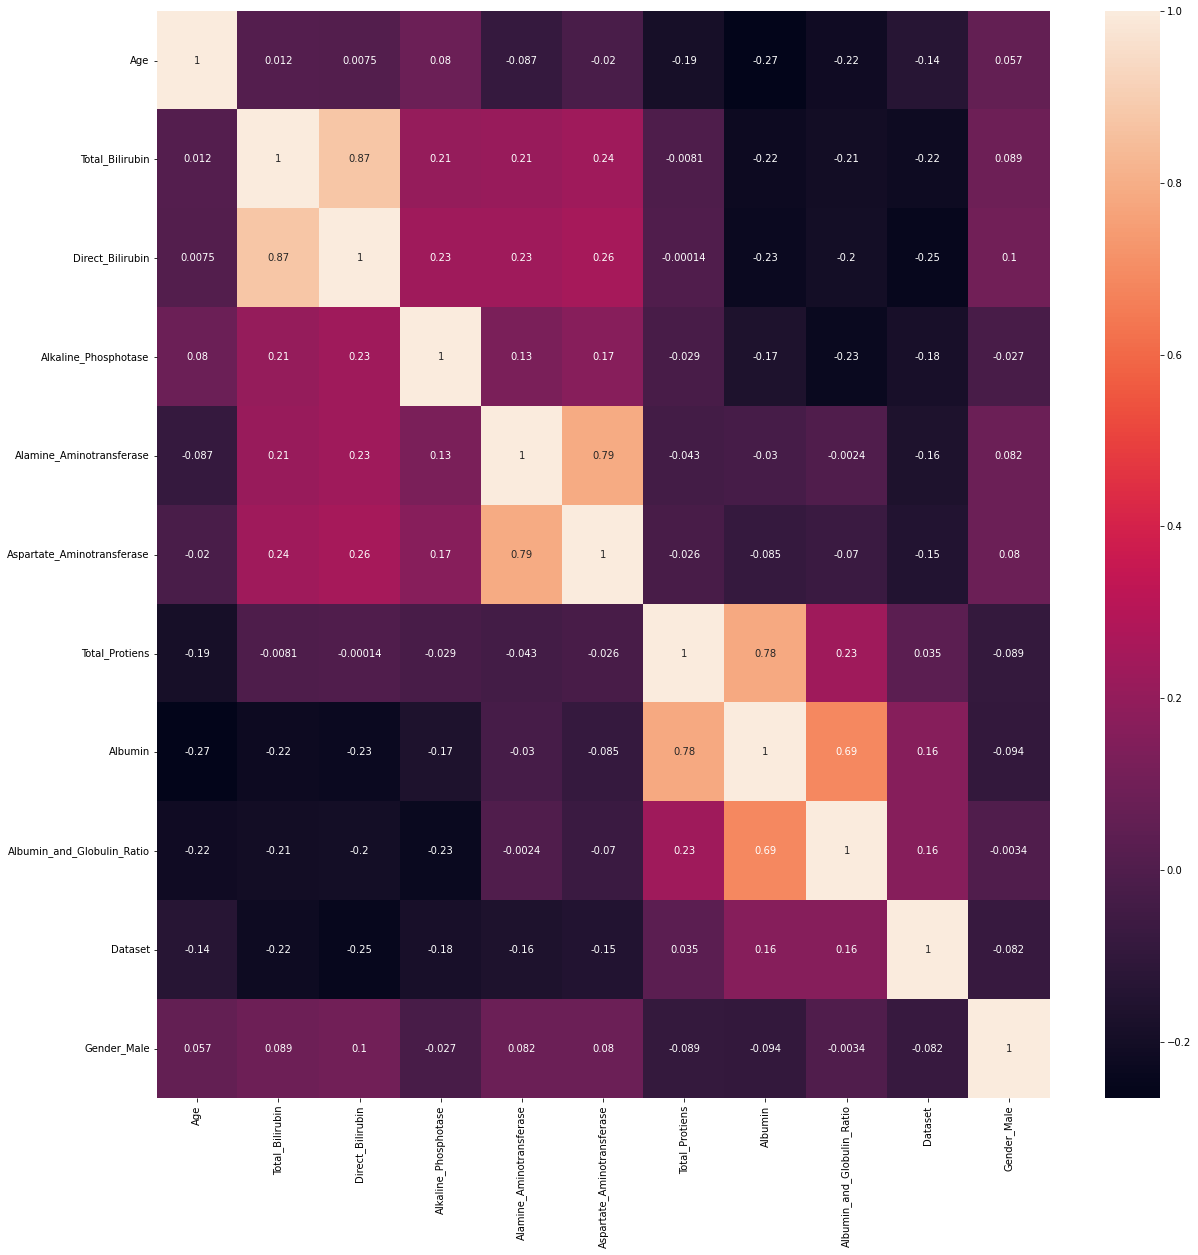

In [12]:
plt.figure(figsize = (20,20))
sns.heatmap(data.corr(), annot = True) #heat map

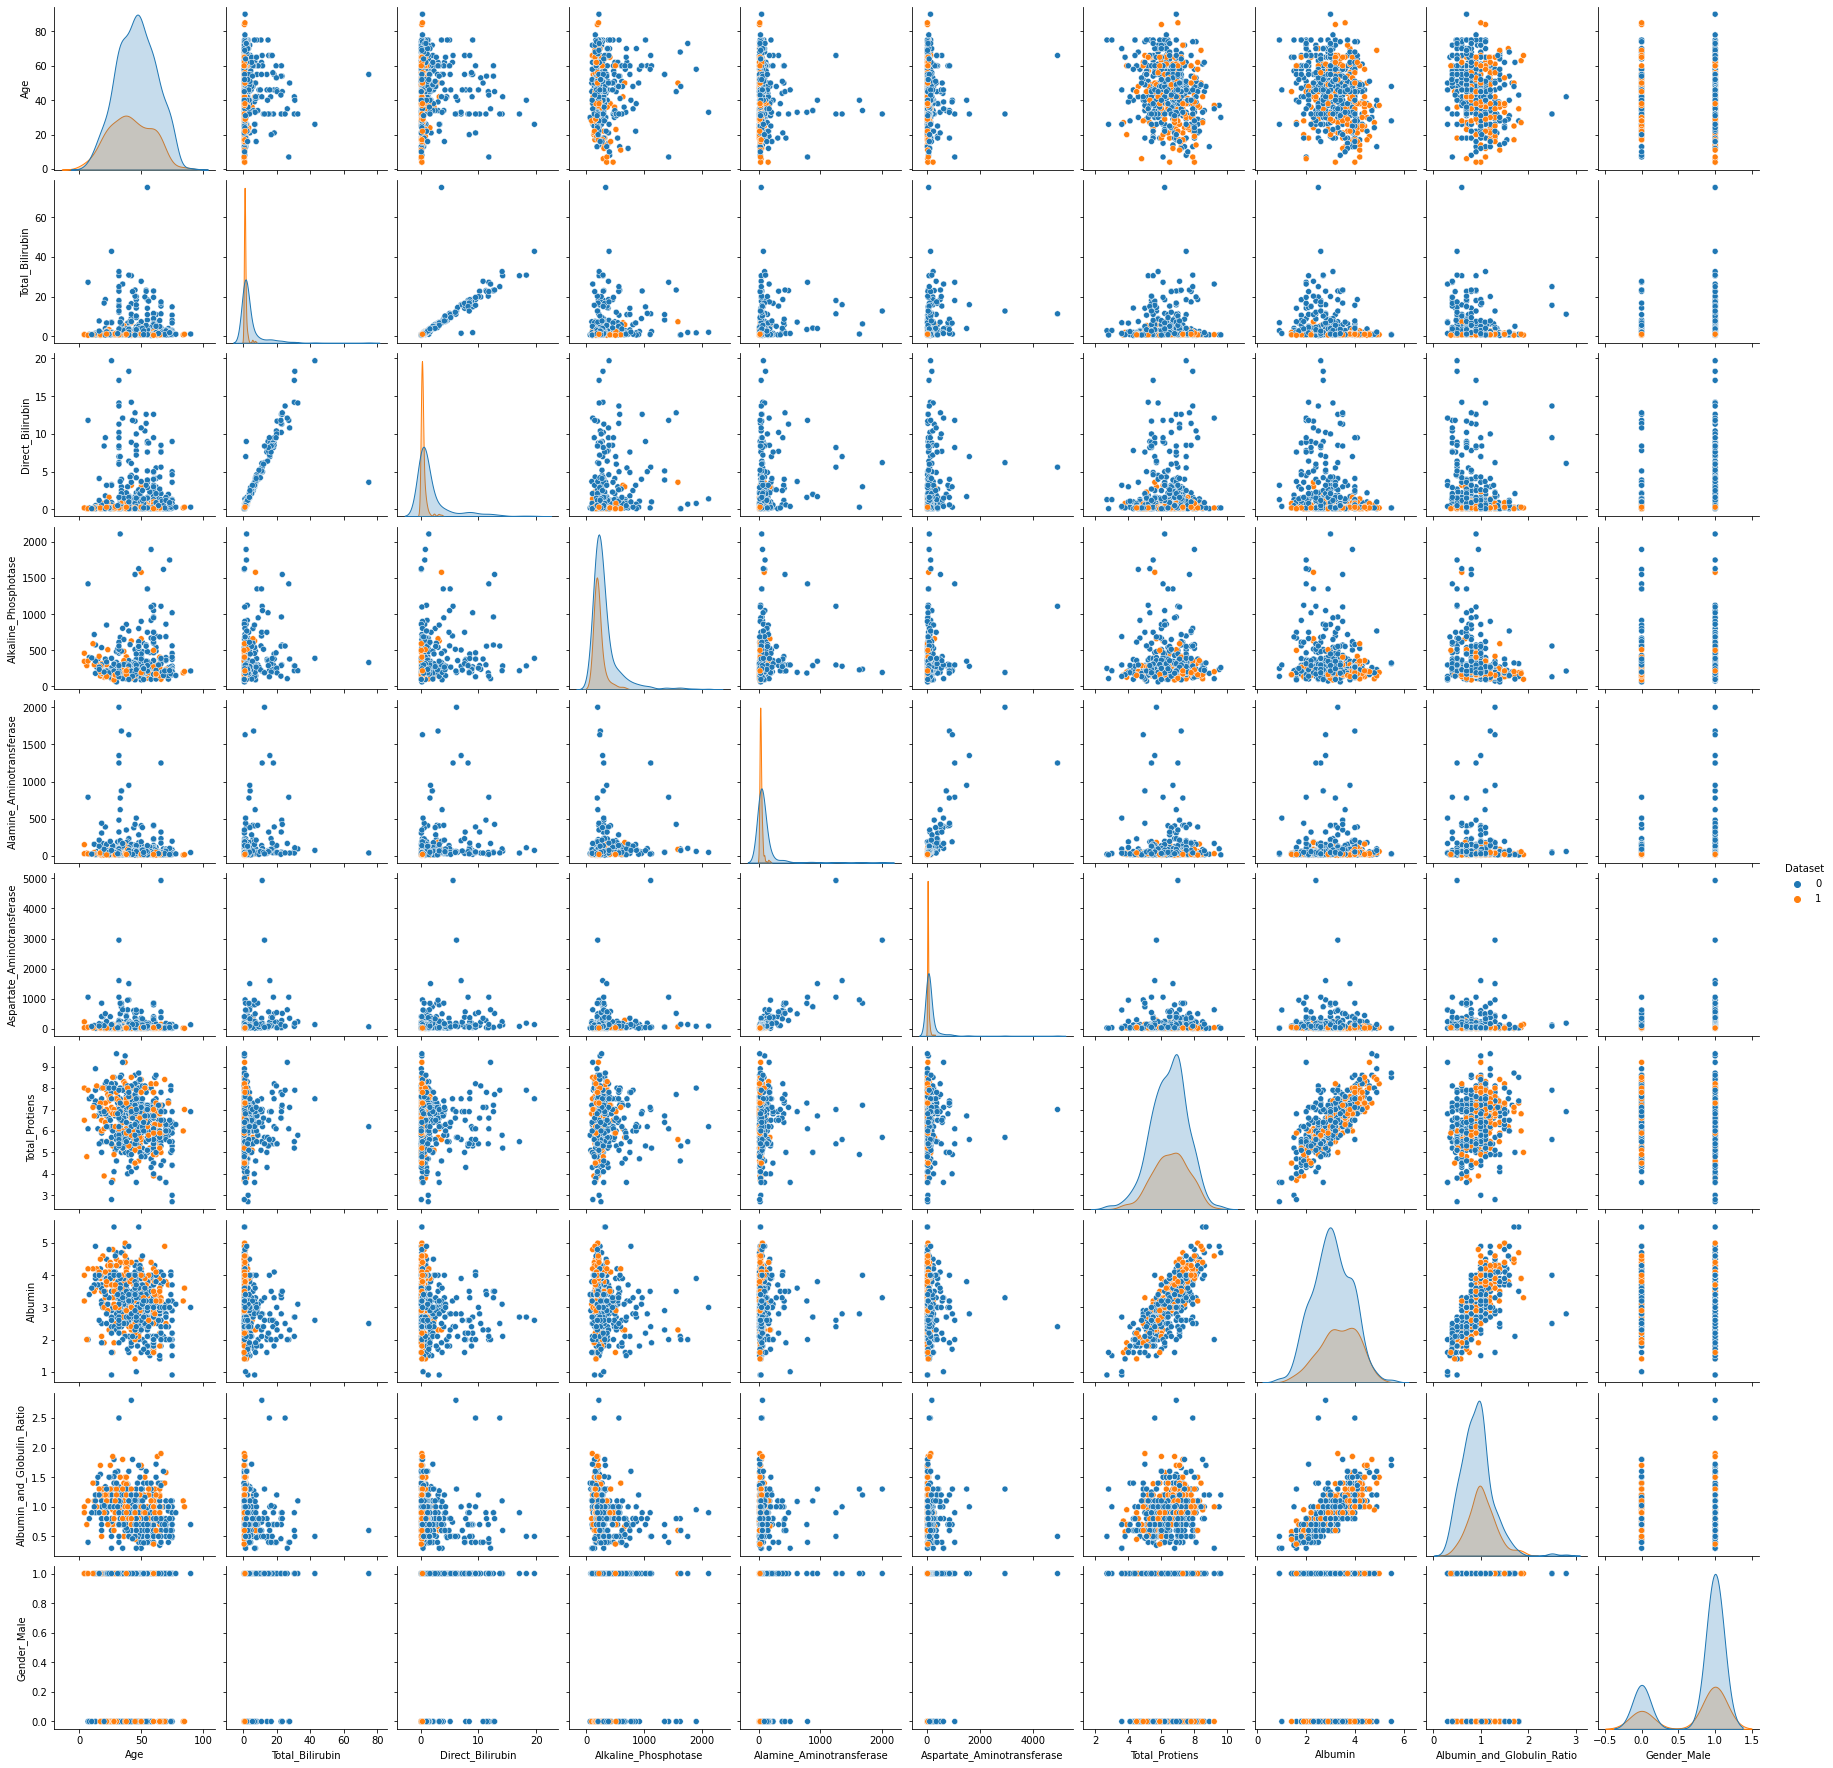

In [13]:
sns.pairplot(data, hue = 'Dataset') #Pairplotting

In [14]:
data.corr()

Age  Total_Bilirubin  Direct_Bilirubin  \
Age                         1.000000         0.011763          0.007529   
Total_Bilirubin             0.011763         1.000000          0.874618   
Direct_Bilirubin            0.007529         0.874618          1.000000   
Alkaline_Phosphotase        0.080425         0.206669          0.234939   
Alamine_Aminotransferase   -0.086883         0.214065          0.233894   
Aspartate_Aminotransferase -0.019910         0.237831          0.257544   
Total_Protiens             -0.187461        -0.008099         -0.000139   
Albumin                    -0.265924        -0.222250         -0.228531   
Albumin_and_Globulin_Ratio -0.216089        -0.206159         -0.200004   
Dataset                    -0.137351        -0.220208         -0.246046   
Gender_Male                 0.056560         0.089291          0.100436   

                            Alkaline_Phosphotase  Alamine_Aminotransferase  \
Age                                     0.080425                 -0.086883   
Total_Bilirubin                         0.206669                  0.214065   
Direct_Bilirubin                        0.234939                  0.233894   
Alkaline_Phosphotase                    1.000000                  0.125680   
Alamine_Aminotransferase                0.125680                  1.000000   
Aspartate_Aminotransferase              0.167196                  0.791966   
Total_Protiens                         -0.028514                 -0.042518   
Albumin                                -0.165453                 -0.029742   
Albumin_and_Globulin_Ratio             -0.233960                 -0.002374   
Dataset                                -0.184866                 -0.163416   
Gender_Male                            -0.027496                  0.082332   

                            Aspartate_Aminotransferase  Total_Protiens  \
Age                                          -0.019910       -0.187461   
Total_Bilirubin                               0.237831       -0.008099   
Direct_Bilirubin                              0.257544       -0.000139   
Alkaline_Phosphotase                          0.167196       -0.028514   
Alamine_Aminotransferase                      0.791966       -0.042518   
Aspartate_Aminotransferase                    1.000000       -0.025645   
Total_Protiens                               -0.025645        1.000000   
Albumin                                      -0.085290        0.784053   
Albumin_and_Globulin_Ratio                   -0.070024        0.233904   
Dataset                                      -0.151934        0.035008   
Gender_Male                                   0.080336       -0.089121   

                             Albumin  Albumin_and_Globulin_Ratio   Dataset  \
Age                        -0.265924                   -0.216089 -0.137351   
Total_Bilirubin            -0.222250                   -0.206159 -0.220208   
Direct_Bilirubin           -0.228531                   -0.200004 -0.246046   
Alkaline_Phosphotase       -0.165453                   -0.233960 -0.184866   
Alamine_Aminotransferase   -0.029742                   -0.002374 -0.163416   
Aspartate_Aminotransferase -0.085290                   -0.070024 -0.151934   
Total_Protiens              0.784053                    0.233904  0.035008   
Albumin                     1.000000                    0.686322  0.161388   
Albumin_and_Globulin_Ratio  0.686322                    1.000000  0.162319   
Dataset                     0.161388                    0.162319  1.000000   
Gender_Male                -0.093799                   -0.003404 -0.082416   

                            Gender_Male  
Age                            0.056560  
Total_Bilirubin                0.089291  
Direct_Bilirubin               0.100436  
Alkaline_Phosphotase          -0.027496  
Alamine_Aminotransferase       0.082332  
Aspartate_Aminotransferase     0.080336  
Total_Protiens                -0.089121  
Albumin                       -0.

In [15]:
# X = data[['Albumin_and_Globulin_Ratio', 'Albumin', 'Total_Protiens', 'Aspartate_Aminotransferase', 'Alamine_Aminotransferase', 'Alkaline_Phosphotase', 'Age']]
X = data.drop('Dataset', axis = 1)
y = data['Dataset']

In [16]:
X.columns

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio',
       'Gender_Male'],
      dtype='object')

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42) #split data

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Model accuracy-> coonfussion matrix

models = {
    "Random Forest": RandomForestClassifier(n_estimators=20),
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {round(accuracy * 100, 2)}%")
    print(f"{name} Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}\n")

Random Forest Accuracy: 86.44%
Random Forest Confusion Matrix:
 [[42  3]
 [ 5  9]]

Logistic Regression Accuracy: 77.97%
Logistic Regression Confusion Matrix:
 [[43  2]
 [11  3]]

Support Vector Machine Accuracy: 76.27%
Support Vector Machine Confusion Matrix:
 [[45  0]
 [14  0]]

K-Nearest Neighbors Accuracy: 74.58%
K-Nearest Neighbors Confusion Matrix:
 [[37  8]
 [ 7  7]]

Decision Tree Accuracy: 61.02%
Decision Tree Confusion Matrix:
 [[31 14]
 [ 9  5]]



c:\Users\appuk\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


*Highest acuuracy Randon forest*

In [20]:
import pickle
pickle.dump(model, open('liver.pkl', 'wb'))